<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif" data-toc-modified-id="Objectif-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif</a></span></li><li><span><a href="#Chargement-des-packages" data-toc-modified-id="Chargement-des-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Chargement des packages</a></span></li><li><span><a href="#Chargement-des-datasets" data-toc-modified-id="Chargement-des-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Chargement des datasets</a></span></li><li><span><a href="#Fonctions-personnalisées" data-toc-modified-id="Fonctions-personnalisées-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fonctions personnalisées</a></span></li><li><span><a href="#Exploration-et-pré-traitement" data-toc-modified-id="Exploration-et-pré-traitement-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploration et pré-traitement</a></span><ul class="toc-item"><li><span><a href="#Découverte-des-datasets" data-toc-modified-id="Découverte-des-datasets-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Découverte des datasets</a></span></li><li><span><a href="#Valeurs-manquantes---Dataset-principal" data-toc-modified-id="Valeurs-manquantes---Dataset-principal-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Valeurs manquantes - Dataset principal</a></span></li><li><span><a href="#Séparation-train_test" data-toc-modified-id="Séparation-train_test-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Séparation train_test</a></span></li><li><span><a href="#Imputation-de-valeurs-manquantes" data-toc-modified-id="Imputation-de-valeurs-manquantes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Imputation de valeurs manquantes</a></span></li><li><span><a href="#Duplicats" data-toc-modified-id="Duplicats-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Duplicats</a></span></li></ul></li><li><span><a href="#Fusion-avec-autres-tables---Données-statiques" data-toc-modified-id="Fusion-avec-autres-tables---Données-statiques-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fusion avec autres tables - Données statiques</a></span><ul class="toc-item"><li><span><a href="#Fusion-avec-POS_CASH_balance" data-toc-modified-id="Fusion-avec-POS_CASH_balance-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fusion avec POS_CASH_balance</a></span></li><li><span><a href="#Fusion-avec-previous_application" data-toc-modified-id="Fusion-avec-previous_application-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Fusion avec previous_application</a></span></li><li><span><a href="#Fusion-avec-bureau" data-toc-modified-id="Fusion-avec-bureau-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Fusion avec bureau</a></span></li></ul></li><li><span><a href="#Table-credit_card_balance---Données-temporelles" data-toc-modified-id="Table-credit_card_balance---Données-temporelles-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Table credit_card_balance - Données temporelles</a></span><ul class="toc-item"><li><span><a href="#Portée-des-mois-d'observation" data-toc-modified-id="Portée-des-mois-d'observation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Portée des mois d'observation</a></span></li><li><span><a href="#Encodage-de-Name_contract_status" data-toc-modified-id="Encodage-de-Name_contract_status-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Encodage de Name_contract_status</a></span></li><li><span><a href="#Création-des-batch-:-fonctionnement-de-la-fonction-create_batch" data-toc-modified-id="Création-des-batch-:-fonctionnement-de-la-fonction-create_batch-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Création des batch : fonctionnement de la fonction <em>create_batch</em></a></span></li><li><span><a href="#Création-du-batch" data-toc-modified-id="Création-du-batch-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Création du batch</a></span></li></ul></li><li><span><a href="#Définition-des-variables" data-toc-modified-id="Définition-des-variables-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Définition des variables</a></span></li><li><span><a href="#Configuration-du-réseau-de-neurones" data-toc-modified-id="Configuration-du-réseau-de-neurones-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Configuration du réseau de neurones</a></span><ul class="toc-item"><li><span><a href="#Définition-des-sets-de-sub_train-et-sub_eval" data-toc-modified-id="Définition-des-sets-de-sub_train-et-sub_eval-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Définition des sets de sub_train et sub_eval</a></span></li><li><span><a href="#Entraînement-du-modèle" data-toc-modified-id="Entraînement-du-modèle-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Entraînement du modèle</a></span></li></ul></li><li><span><a href="#Modèle-XGBoost" data-toc-modified-id="Modèle-XGBoost-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Modèle XGBoost</a></span></li></ul></div>

# Objectif

# Chargement des packages

In [134]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
import seaborn as sns
import os
import missingno as msno
import warnings
import time
from urllib import request
from zipfile import ZipFile
from sklearn.model_selection import GroupShuffleSplit
from sklearn import preprocessing
import datetime
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Reshape, Dense, BatchNormalization, Masking, LSTM
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import GroupShuffleSplit, train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import xgboost as xgb
from random import seed

pd.options.mode.chained_assignment = None 
warnings.simplefilter(action='ignore', category=FutureWarning)

# ----- Paramètres -----

## Nom du dossier data
path = "./data"
## Nom du fichier zip
filepath = path + "/prj7_data.zip"
## Source du fichier zip
zip_url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9120/860599/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620896494&Signature=sExz0pdzSGvmb6V0LSOB27qrh%2BIB2ZaVOYLGj2wAds8eSSdEn%2FhQEN%2FXh1vPXEiXLYwoVM1QLc5E6t7ujJnJuspXqhqRD9zUSSar6y0F%2Fi1gDMk1klzSCL0mLUNr1%2BkLohz3L%2BNikWROA7rXceZH7Hi5nL7QBluzkL2G8bNseDn6YFp%2FlRkK%2FY18Plyxx2mU3%2FuDmAeamc6NZENSDcPgKoxWxz0wWBw%2BXFcsIBvcLx3tSs%2Bdg4HDzi0xyFtBtXMyiACmFTZyLcwkDfqFAAUZSBYsV%2Bvp%2Foe7aPC0jYLYo7O9Nv40wjfhj3QRa95ipqDOxB4cSXW%2FqlT0Ai4isYNuPA%3D%3D&response-content-disposition=attachment%3B+filename%3Dhome-credit-default-risk.zip"

# Chargement des datasets

In [2]:
# Création du dossier data
if not os.path.exists(path):
    os.makedirs(path)

# Téléchargement et dézippage des datasets
if not os.path.exists(filepath):
    r = requests.get(zip_url, allow_redirects=True)

    open(filepath, 'wb').write(r.content)

    with ZipFile(filepath, "r") as zipObj:
        zipObj.extractall(path)

In [3]:
application_test = pd.read_csv("./data/application_test.csv")
application_train = pd.read_csv("./data/application_train.csv")
bureau = pd.read_csv("./data/bureau.csv")
bureau_balance = pd.read_csv("./data/bureau_balance.csv")
credit_card_balance = pd.read_csv("./data/credit_card_balance.csv")
HomeCredit_columns_description = pd.read_csv("./data/HomeCredit_columns_description.csv", engine = "python")
installments_payments = pd.read_csv("./data/installments_payments.csv")
POS_CASH_balance = pd.read_csv("./data/POS_CASH_balance.csv")
previous_application = pd.read_csv("./data/previous_application.csv")

# Fonctions personnalisées

In [4]:
def describe_dataset(dataset):
    print("Le dataset contient {} observations et {} variables".format(dataset.shape[0], dataset.shape[1]))
    print("\n")
    if dataset.shape[1] <= 20:
        print("Variables du dataset :")
        print(dataset.columns.tolist())
        print("\n")
    print("Vue d'ensemble des valeurs manquantes :")
    print(dataset.isna().sum())
    

def create_batch(dataframe, time_start, t_colname="MONTHS_BALANCE", id_colname="SK_ID_CURR"):
    # Calculate number of time blocks
    oldest_time = -96
    n_time_blocks = -(oldest_time - time_start) + 1
    
    # Define which months to iterate on
    time_range = [-timestamp for timestamp in range(-time_start, -oldest_time + 1)]
    # Define list of client IDs
    id_list = dataframe[id_colname].unique().tolist()
    id_list.sort()
    
    # Figure out output cube shape
    observations_shape = len(id_list) 
    features_shape = dataframe.drop(columns = [t_colname, id_colname]).shape[1]
    
    # Create output cube
    output_cube = np.zeros((observations_shape, features_shape, n_time_blocks))

    # Fill cube
    for x, unique_id in enumerate(id_list):
        client_info = dataframe.loc[dataframe[id_colname] == unique_id, :]
        for z, month in enumerate(time_range):                      
            if month in client_info[t_colname].tolist():
                monthly_client_info = client_info.loc[client_info[t_colname] == month, :].drop(columns = [t_colname, id_colname])
                output_cube[x, :, z] = monthly_client_info
                
    return(output_cube)

def dataset_preprocessing(dataframe, categorical_features):
    for categorical_var in categorical_features:
        encoder = preprocessing.LabelEncoder()
        dataframe[categorical_var] = encoder.fit_transform(dataframe[categorical_var])
    return dataframe

def create_embedding_model(categorical_variable_vector, input_layer_name):
    variable_nbins = len(categorical_variable_vector.unique())
    input_layer = Input(shape = (1,), name = input_layer_name)
    embedding_layer = Embedding(variable_nbins, 36, 
                            trainable = True, 
                           embeddings_initializer = tf.initializers.random_normal
                           )(input_layer)
    reshape_layer = Reshape(target_shape = (36,))(embedding_layer)
    return(input_layer, reshape_layer)

def make_all_embedders(dataset, categorical_variables_list, numerical_variables_list):
    models = []
    inputs = []
    for categorical_var in categorical_variables_list:
        input_layer_name = categorical_var + "_input"
        (inpt, outpt) = create_embedding_model(dataset[categorical_var], input_layer_name = input_layer_name)
        inputs.append(inpt)
        models.append(outpt)
    num_inpt = Input(shape = (len(numerical_variables_list)), name = "num_input")
    inputs.append(num_inpt)
    models.append(num_inpt)
    return(inputs, models)

# Exploration et pré-traitement

## Découverte des datasets

In [5]:
dataset_list = [application_test, application_train, bureau, bureau_balance, credit_card_balance, 
               HomeCredit_columns_description, installments_payments, POS_CASH_balance, previous_application]
dataset_list_names = ["application_test", "application_train", "bureau", "bureau_balance", "credit_card_balance", 
               "HomeCredit_columns_description", "installments_payments", "POS_CASH_balance", "previous_application"]

In [6]:
for dataset, dataset_name in zip(dataset_list, dataset_list_names):
    print("Exploration du dataset {}".format(dataset_name))
    describe_dataset(dataset)
    print("\n")
    print("---------------------------------")
    print("\n")

Exploration du dataset application_test
Le dataset contient 48744 observations et 121 variables


Vue d'ensemble des valeurs manquantes :
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64


---------------------------------


Exploration du dataset application_train
Le dataset contient 307511 observations et 122 variables


Vue d'ensemble des valeurs manquantes :
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU

In [7]:
if not os.path.exists("./databook.xlsx"):
    HomeCredit_columns_description.to_excel("./databook.xlsx")

In [8]:
application_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [9]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Valeurs manquantes - Dataset principal

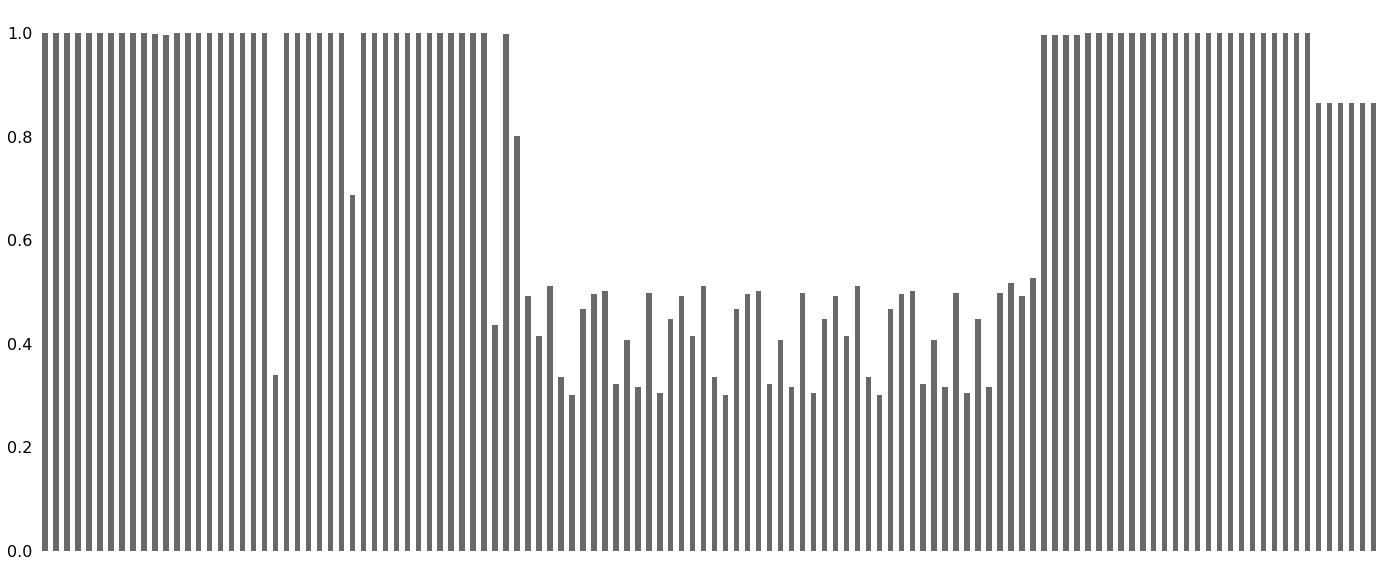

In [10]:
msno.bar(application_train)

In [11]:
na_count = application_train.isna().sum()

In [12]:
na_count_df = pd.DataFrame()
na_count_df["column"] = na_count.index
na_count_df["nas"] = na_count.values
na_count_df["na_proportion"] = na_count_df["nas"].apply(lambda X : round(X / application_train.shape[0], 2))

drop_cols_list = na_count_df.loc[na_count_df["na_proportion"] >= 0.2, "column"].tolist()
print(len(drop_cols_list))

51


In [13]:
data = application_train.drop(columns = drop_cols_list)

In [14]:
na_count2 = data.isna().sum()

In [15]:
na_count2[na_count2 > 0]

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [16]:
fillna_values = {}

for column in ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
 "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]:
    fillna_values[column] = 0
    
fillna_values["NAME_TYPE_SUITE"] = "Unaccompanied"

data.fillna(value = fillna_values, inplace = True)

In [17]:
data.dropna(subset = ["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_FAM_MEMBERS", "DAYS_LAST_PHONE_CHANGE"], inplace = True)

## Séparation train_test

In [18]:
inTrain , inTest = next(GroupShuffleSplit(train_size = 0.7, random_state = 42).\
                        split(data, groups = data["SK_ID_CURR"])
                       )
def trainset(dataset, subsetter=inTrain):
    return dataset.iloc[subsetter]

In [19]:
X = data.drop(columns = "TARGET")
y_train = trainset(data["TARGET"])
y_test = data["TARGET"].iloc[inTest]

In [20]:
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X.shape

(307220, 70)

In [22]:
y_train.shape

(215054,)

In [23]:
y_test.shape

(92166,)

In [24]:
trainset(X).shape

(215054, 70)

In [25]:
X.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307220.000000,307220.000000,3.072200e+05,3.072200e+05,307220.000000,3.072200e+05,307220.000000,307220.000000,307220.000000,307220.000000,...,307220.000000,307220.000000,307220.000000,307220.000000,307220.00000,307220.000000,307220.000000,307220.000000,307220.000000,307220.000000
mean,278171.250368,0.416978,1.688327e+05,5.993174e+05,27120.456294,5.383983e+05,0.020870,-16038.811428,63851.304010,-4986.328699,...,0.008134,0.000596,0.000508,0.000329,0.00554,0.006061,0.029728,0.231404,0.229682,1.643708
std,102788.220340,0.722048,2.372203e+05,4.025198e+05,14492.130232,3.694486e+05,0.013832,4363.839034,141306.101586,3523.145205,...,0.089823,0.024399,0.022528,0.018129,0.07803,0.103086,0.190760,0.857088,0.744252,1.855939
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189141.750000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,-19684.000000,-2760.000000,-7480.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278194.500000,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,-15753.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367126.250000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12415.000000,-289.000000,-2009.750000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.00000,9.000000,8.000000,27.000000,261.000000,25.000000


## Imputation de valeurs manquantes

In [26]:
X.fillna(value = {"EXT_SOURCE_2" : trainset(X)["EXT_SOURCE_2"].quantile(0.5)}, 
         inplace = True)

## Duplicats

In [27]:
nrows_prev = X.shape[0]
X.drop_duplicates(subset = "SK_ID_CURR", inplace = True)
print("Suppression de {} duplicats".format(X.shape[0] - nrows_prev))

Suppression de 0 duplicats


# Fusion avec autres tables - Données statiques

## Fusion avec POS_CASH_balance

In [28]:
SK_DPD_DEF_min = POS_CASH_balance.loc[:, ["SK_ID_CURR", "SK_DPD_DEF"]].groupby(by = "SK_ID_CURR").min()
SK_DPD_DEF_min.rename(columns = {"SK_DPD_DEF" : "SK_DPD_DEF_min"}, inplace = True)

In [29]:
SK_DPD_DEF_max = POS_CASH_balance.loc[:, ["SK_ID_CURR", "SK_DPD_DEF"]].groupby(by = "SK_ID_CURR").max()
SK_DPD_DEF_max.rename(columns = {"SK_DPD_DEF" : "SK_DPD_DEF_max"}, inplace = True)

In [30]:
SK_DPD_DEF_med = POS_CASH_balance.loc[:, ["SK_ID_CURR", "SK_DPD_DEF"]].groupby(by = "SK_ID_CURR").agg(lambda X: np.quantile(X, 0.5))
SK_DPD_DEF_med.rename(columns = {"SK_DPD_DEF" : "SK_DPD_DEF_med"}, inplace = True)

In [31]:
SK_DPD_DEF_charac = pd.merge(SK_DPD_DEF_min, SK_DPD_DEF_max, on = "SK_ID_CURR", how = "outer")
SK_DPD_DEF_charac = pd.merge(SK_DPD_DEF_charac, SK_DPD_DEF_med, on = "SK_ID_CURR", how = "outer")

In [32]:
X = pd.merge(X, SK_DPD_DEF_charac, on = "SK_ID_CURR", how = "left")

In [33]:
X.fillna(value = {"SK_DPD_DEF_min" : trainset(X)["SK_DPD_DEF_min"].quantile(0.5),
                 "SK_DPD_DEF_max" : trainset(X)["SK_DPD_DEF_max"].quantile(0.5),
                 "SK_DPD_DEF_med" : trainset(X)["SK_DPD_DEF_med"].quantile(0.5)}, 
         inplace = True)

## Fusion avec previous_application

In [34]:
loan_history = previous_application.loc[:, ["SK_ID_CURR", "AMT_CREDIT"]].groupby(by = "SK_ID_CURR").sum()
loan_history.rename(columns = {"AMT_CREDIT" : "TOTAL_AMT_CREDIT"}, inplace = True)

In [35]:
X = pd.merge(X, loan_history, on = "SK_ID_CURR", how = "left")

In [36]:
X.fillna(value = {"TOTAL_AMT_CREDIT" : 0}, inplace = True)

## Fusion avec bureau

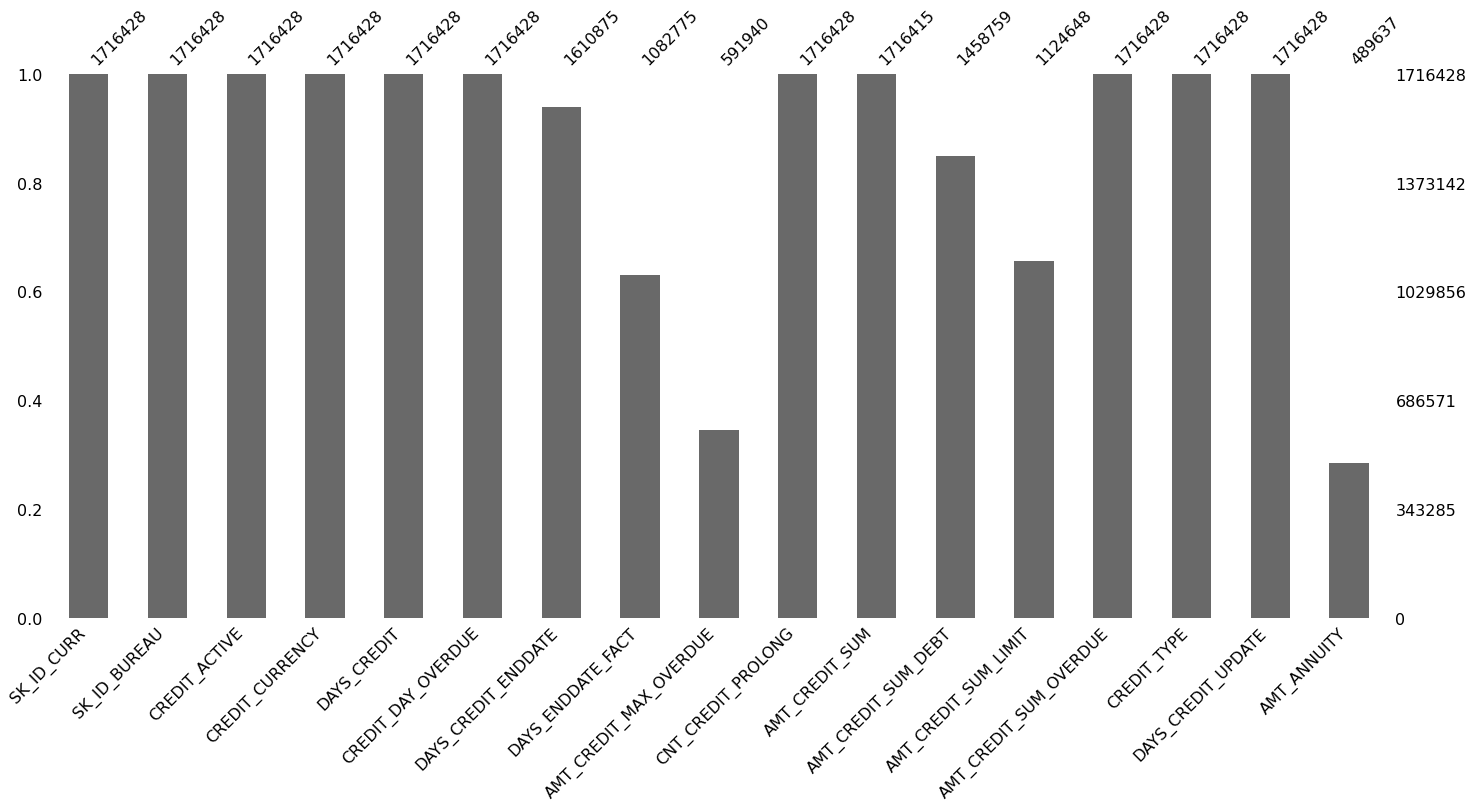

In [37]:
msno.bar(bureau)

In [38]:
def numstats(df, group_var, df_name):

    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

def catstats(df, group_var, df_name):
 
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [39]:
num_stats_bureau = numstats(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
num_stats_bureau.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [40]:
cat_stats_bureau = catstats(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
cat_stats_bureau.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [41]:
print(num_stats_bureau.shape)
print(cat_stats_bureau.shape)

(305811, 61)
(305811, 46)


In [42]:
X.shape

(307220, 74)

In [43]:
bureau_stats = pd.merge(num_stats_bureau, cat_stats_bureau, left_on = "SK_ID_CURR", right_index = True, how = "outer")

In [44]:
bureau_stats.shape

(305811, 107)

In [45]:
tempnan = bureau_stats.isna().sum()

In [46]:
dropcols_bureau = tempnan[tempnan / bureau_stats.shape[0] > 0.2].index.tolist()

In [47]:
bureau_stats.drop(columns = dropcols_bureau, inplace = True)

In [48]:
bureau_stats.fillna(0, inplace = True)

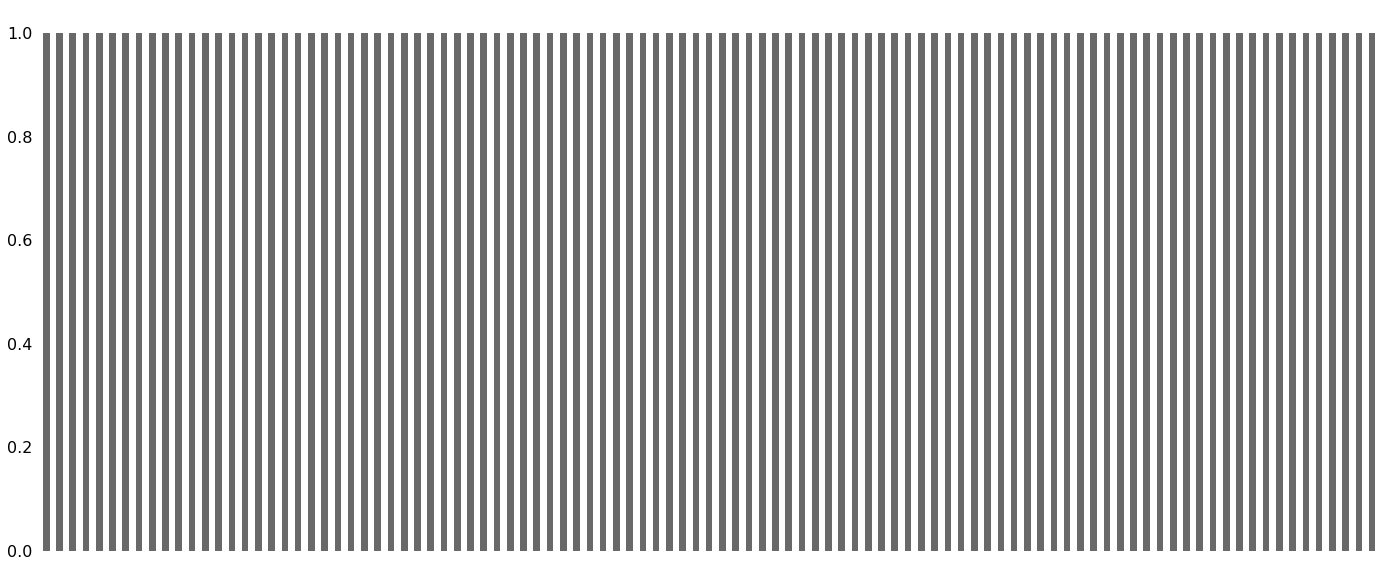

In [49]:
msno.bar(bureau_stats)

In [50]:
X = pd.merge(X, bureau_stats, on = "SK_ID_CURR", how = "left")

In [51]:
X.fillna(0, inplace = True)

# Table credit_card_balance - Données temporelles

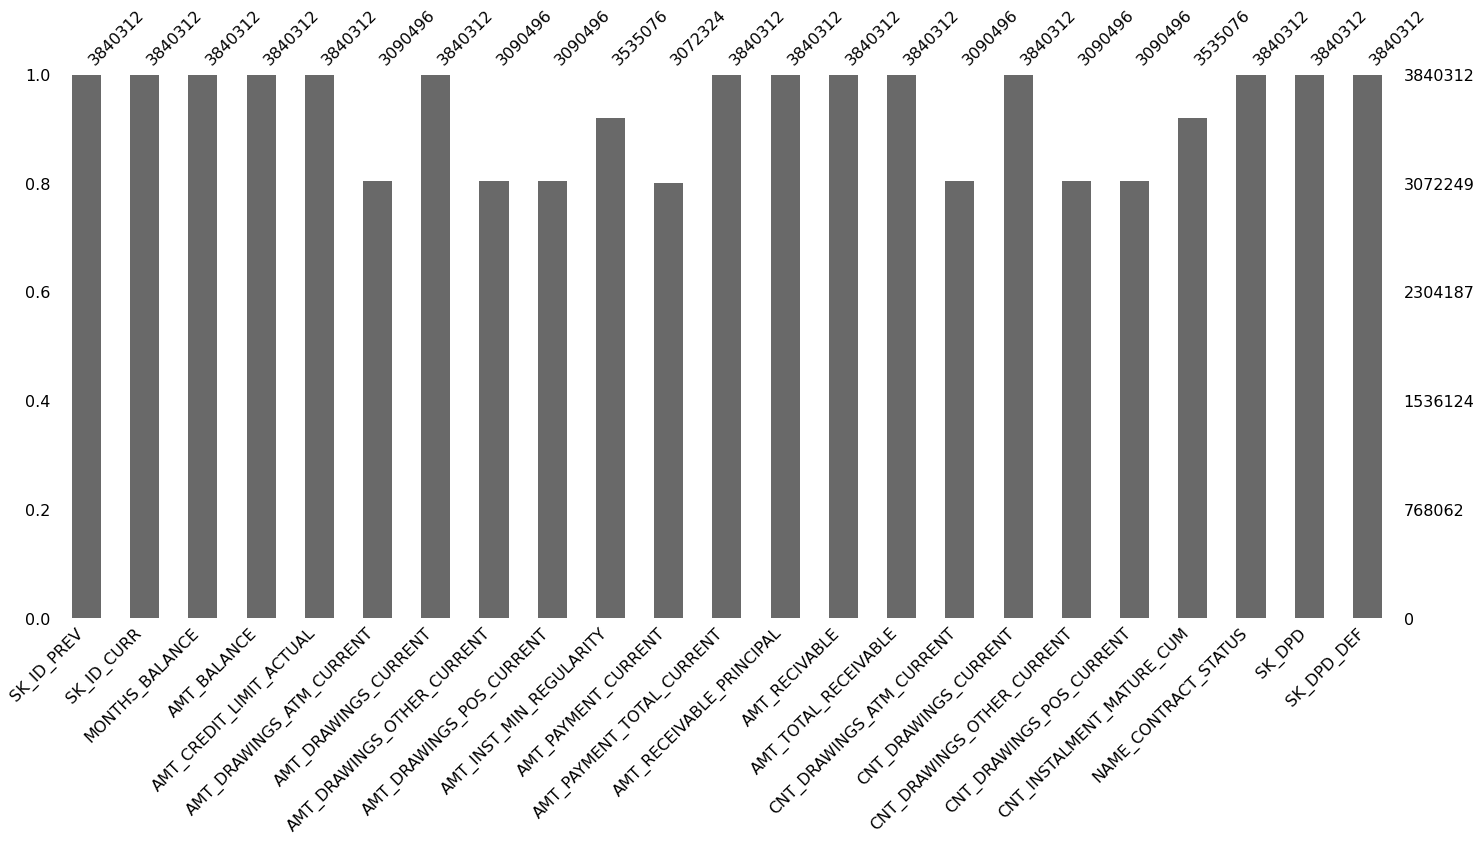

In [52]:
msno.bar(credit_card_balance)

In [53]:
credit_card_balance.fillna(0, inplace = True)

In [54]:
len(credit_card_balance["SK_ID_CURR"].unique())

103558

In [55]:
credit_card_balance.drop(columns = "SK_ID_PREV", inplace = True)

In [56]:
X_temporal = pd.merge(X, credit_card_balance, on = "SK_ID_CURR", how = "left")

In [57]:
X_temporal.sort_values(["SK_ID_CURR", "MONTHS_BALANCE"], inplace = True)

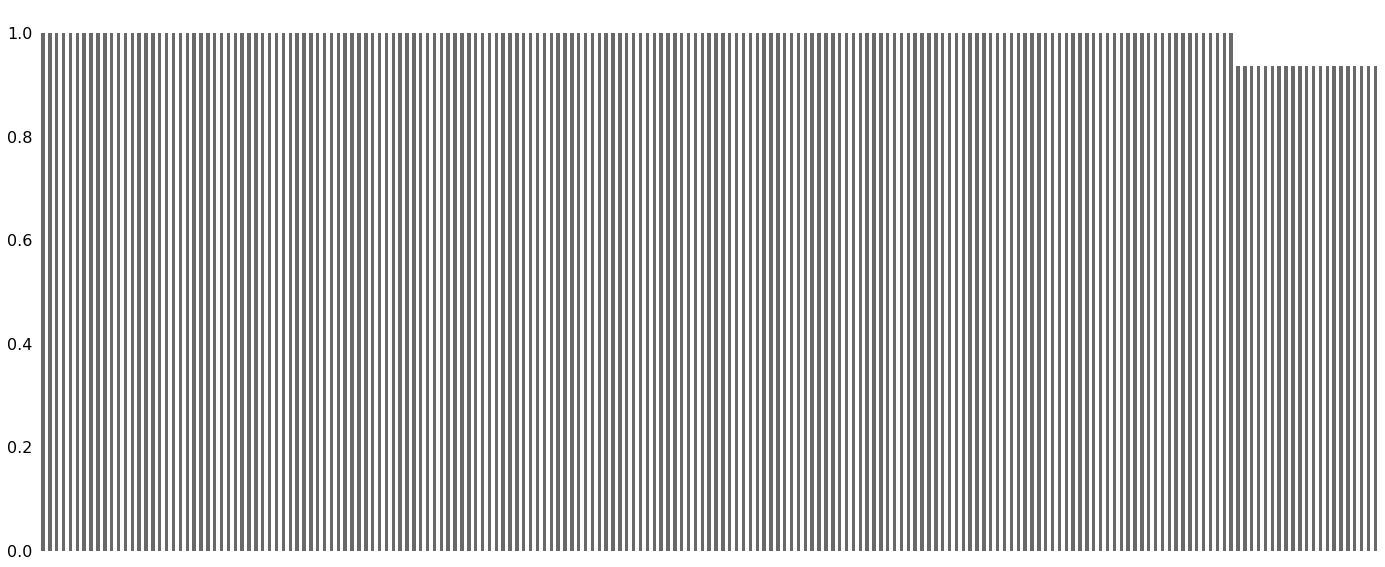

In [58]:
msno.bar(X_temporal)

In [59]:
fillna_values2 = {}
for colname in ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_CURRENT', 
             'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 
             'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 
             'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 
             'SK_DPD', 'SK_DPD_DEF']:
    fillna_values2[colname] = 0
fillna_values2['MONTHS_BALANCE'] = -1
fillna_values2['NAME_CONTRACT_STATUS'] = "Active"

In [60]:
X_temporal.fillna(value = fillna_values2, inplace = True)

## Portée des mois d'observation

In [61]:
X_temporal["MONTHS_BALANCE"].min()

-96.0

In [62]:
X_temporal["MONTHS_BALANCE"].max()

-1.0

## Encodage de Name_contract_status

In [63]:
le_NCS = preprocessing.LabelEncoder()
le_NCS.fit(X_temporal['NAME_CONTRACT_STATUS'])

LabelEncoder()

In [64]:
X_temporal['NAME_CONTRACT_STATUS'] = le_NCS.transform(X_temporal['NAME_CONTRACT_STATUS'])

## Création des batch : fonctionnement de la fonction *create_batch*

In [65]:
temporal_cols = ['SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_CURRENT', 
             'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 
             'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 
             'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 
                 'SK_DPD', 'SK_DPD_DEF']

In [66]:
temp = X_temporal.loc[:, temporal_cols]

In [67]:
temp = temp.head(1000)

In [68]:
temp.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,100002,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100006,-6.0,0.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100006,-5.0,0.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Créons un batch allant du mois -1 jusqu'au maximum :

In [69]:
tempcube = create_batch(temp, -1)

Regardons l'apparence du cube

In [70]:
tempcube.shape

(124, 19, 96)

On voit que les valeurs correspondent bien à celles du dataset :

In [71]:
tempcube[3, :, 0]

array([     0., 270000.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.])

In [72]:
temp.loc[(temp["SK_ID_CURR"] == 100006) & (temp["MONTHS_BALANCE"] == -1), 'AMT_BALANCE':]

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
4,0.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Création du batch

In [73]:
X_temporal = X_temporal.loc[:, temporal_cols]

In [74]:
nrows_prev = X_temporal.shape[0]
X_temporal.drop_duplicates(subset = ["SK_ID_CURR", "MONTHS_BALANCE"], inplace = True)
print("Suppression de {} duplicats".format(nrows_prev - X_temporal.shape[0]))

Suppression de 5035 duplicats


In [75]:
X_temporal.shape

(3442842, 21)

In [76]:
if os.path.exists("./data/pickle_cube"):
    with open("./data/pickle_cube", 'rb') as file:
        print("Chargement du pickle")
        X_batch = pickle.load(file)
else:
    start_clock = time.time()
    X_batch = create_batch(X_temporal, -1)
    print("Batch généré en {}s".format(round(time.time() - start_clock)))

Chargement du pickle


In [77]:
if not os.path.exists("./data/pickle_cube"):
    with open("./data/pickle_cube", 'wb') as file:
            pickle.dump(X_batch, file)

In [78]:
X_batch.shape

(307220, 19, 96)

In [79]:
X_train_batch = X_batch[inTrain, :, :]

In [80]:
X_train_batch.shape

(215054, 19, 96)

# Définition des variables

In [81]:
numcols = X.select_dtypes('number').columns.tolist()

In [82]:
idcols = ["SK_ID_CURR"]
binary_cat_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT',
                   'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                   'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                   'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                   'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
no_info_cols = ["WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"]

In [83]:
catcols = list(set(X.columns.tolist()).difference(numcols))
catcols = list(set(catcols).difference({'WEEKDAY_APPR_PROCESS_START'}))

In [84]:
catcols += binary_cat_cols

In [85]:
numcols = list(set(numcols).difference(set(idcols + binary_cat_cols + no_info_cols)))

In [86]:
X.shape[1] - (len(idcols)+len(catcols)+len(numcols)+len(no_info_cols))

0

# Configuration du réseau de neurones

In [87]:
X_enc = dataset_preprocessing(X, catcols)

In [88]:
inputs, models = make_all_embedders(X_enc, catcols, numcols)

In [89]:
temporal_input = Input(name = "temporal_input", shape = (19, 96))
temporal_input_masked = Masking(mask_value=0.)(temporal_input)

temporal_lstm = LSTM(19, activation="relu")(temporal_input_masked) 

inputs.append(temporal_input)
models.append(temporal_lstm)

In [90]:
merged_models = tf.keras.layers.concatenate(models)

In [91]:
dense_layer_1 = Dense(1000)(merged_models)
batchnorm_layer_1 = BatchNormalization()(dense_layer_1)
dense_layer_2 = Dense(1000)(batchnorm_layer_1)
batchnorm_layer_2 = BatchNormalization()(dense_layer_2)

prediction_layer = Dense(1, activation = "sigmoid")(batchnorm_layer_2)

final_model = Model(inputs = inputs, outputs = prediction_layer)

In [92]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
NAME_TYPE_SUITE_input (InputLay [(None, 1)]          0                                            
__________________________________________________________________________________________________
NAME_CONTRACT_TYPE_input (Input [(None, 1)]          0                                            
__________________________________________________________________________________________________
NAME_INCOME_TYPE_input (InputLa [(None, 1)]          0                                            
__________________________________________________________________________________________________
ORGANIZATION_TYPE_input (InputL [(None, 1)]          0                                            
______________________________________________________________________________________________

In [93]:
roc_metric = tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name='auc_2', dtype=None,
    thresholds=None, multi_label=False, label_weights=None,
)

In [94]:
y_train[y_train == 0].shape[0] / y_train[y_train == 1].shape[0]

11.411496508339585

In [95]:
class_weight = {0: 1.,
                1: 11.
               }

In [96]:
final_model.compile(loss = "binary_crossentropy", metrics = [roc_metric], optimizer = "adam")

In [97]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc_2', patience=20, min_delta = 0.001, 
                                            restore_best_weights = True)

## Définition des sets de sub_train et sub_eval

In [98]:
X_enc_train = trainset(X_enc)

In [99]:
inSubTrain , inSubEval = next(GroupShuffleSplit(train_size = 0.8, random_state = 42).\
                        split(X_enc_train, groups = X_enc_train["SK_ID_CURR"])
                       )

In [100]:
X_enc_subtrain = trainset(X_enc_train, subsetter=inSubTrain)
X_enc_subeval = trainset(X_enc_train, subsetter=inSubEval)

In [101]:
X_subtrain_batch = X_train_batch[inSubTrain, :, :]
X_subeval_batch = X_train_batch[inSubEval, :, :]

In [102]:
y_enc_subtrain = trainset(y_train, subsetter=inSubTrain)
y_enc_subeval = trainset(y_train, subsetter=inSubEval)

## Entraînement du modèle

In [129]:
input_dict = {}
for categorical_var in catcols:
    keyname = categorical_var + "_input" 
    input_dict[keyname] = X_enc_subtrain[categorical_var]
input_dict["num_input"] = X_enc_subtrain[numcols]
input_dict["temporal_input"] = X_subtrain_batch

eval_dict = {}
for categorical_var in catcols:
    keyname = categorical_var + "_input" 
    eval_dict[keyname] = X_enc_subeval[categorical_var]
eval_dict["num_input"] = X_enc_subeval[numcols]
eval_dict["temporal_input"] = X_subeval_batch

In [130]:
tf.config.run_functions_eagerly(True)

In [131]:
#final_model.load_weights("./data/final_model_weights.h5")

In [132]:
final_model.fit(input_dict, y_enc_subtrain, epochs = 20, batch_size = 100, 
                validation_data = (eval_dict, y_enc_subeval), callbacks = [callback], class_weight=class_weight, verbose = 1)

C:\Users\Antoine\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
C:\Users\Antoine\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/20
1721/1721 [==============================] - ETA: 0s - loss: 1.3765 - auc_2: 0.5646

C:\Users\Antoine\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


1721/1721 [==============================] - 372s 216ms/step - loss: 1.3765 - auc_2: 0.5646 - val_loss: 0.6170 - val_auc_2: 0.5763
Epoch 2/20
1721/1721 [==============================] - 443s 258ms/step - loss: 1.2353 - auc_2: 0.6136 - val_loss: 0.5840 - val_auc_2: 0.5996
Epoch 3/20
1721/1721 [==============================] - 437s 254ms/step - loss: 1.2256 - auc_2: 0.6207 - val_loss: 0.6670 - val_auc_2: 0.6274
Epoch 4/20
1721/1721 [==============================] - 457s 266ms/step - loss: 1.2195 - auc_2: 0.6341 - val_loss: 0.5632 - val_auc_2: 0.6479
Epoch 5/20
1721/1721 [==============================] - 459s 267ms/step - loss: 1.2209 - auc_2: 0.6272 - val_loss: 0.6625 - val_auc_2: 0.6516
Epoch 6/20
1721/1721 [==============================] - 451s 262ms/step - loss: 1.2076 - auc_2: 0.6459 - val_loss: 0.6630 - val_auc_2: 0.6401
Epoch 7/20
1721/1721 [==============================] - 464s 270ms/step - loss: 1.2230 - auc_2: 0.6383 - val_loss: 0.6556 - val_auc_2: 0.6496
Epoch 8/20
1721/1

In [153]:
overwrite_model = True

In [156]:
if overwrite_model:
    final_model.save_weights("./data/final_model_weights.h5")

# Modèle XGBoost

In [104]:
X2 = X.copy()

In [116]:
ohe = OneHotEncoder(sparse = False)
X2_cat = pd.DataFrame(ohe.fit_transform(X2[catcols]))
X2_cat.columns = ohe.get_feature_names(catcols)

In [119]:
X2_num = pd.DataFrame(StandardScaler().fit_transform(X2[numcols]))
X2_num.columns = numcols

In [122]:
X2_comb = pd.concat([X2_num, X2_cat], axis = 1)

In [125]:
X2_comb.index = X2["SK_ID_CURR"]

In [128]:
X2_comb_train = trainset(X2_comb)
X2_comb_test = trainset(X2_comb, subsetter = inTest)

In [129]:
space = {
    'max_depth' : hp.choice('max_depth', range(1, 30, 1)),
    'eta' : hp.quniform('eta', 0, 1, 0.1),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1.0, 0.01),
    'colsample_bynode' : hp.quniform('colsample_bynode', 0.1, 1.0, 0.01),
    'max_delta_step' : hp.choice('max_delta_step', range(0, 11, 1))
}

In [ ]:
seed(0)
best = 0
def hyperparameter_tuning(space):
    global best
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    warnings.filterwarnings(action='ignore', category=UserWarning)
    classifier = xgb.XGBClassifier(objective = "binary:logistic",
                            tree_method = 'hist',
                            scale_pos_weight = 6,
                            eta = space['eta'],
                            n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree'],
                            colsample_bylevel = space['colsample_bylevel'],
                            colsample_bynode = space['colsample_bynode'],
                            eval_metric = "auc",
                            max_delta_step = space['max_delta_step']
                            )
    
    classifier.fit(X2_comb_train, y_train.tolist())
    
    roc_auc = cross_val_score(estimator = classifier, X = X2_comb_train, y = y_train.tolist(),
                              scoring="roc_auc", cv = 10).mean()
    if acc > best:
        best = acc
        print ('new best:', best, space)
    return {'loss': 1-acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(hyperparameter_tuning, space, algo=tpe.suggest, max_evals=100, trials=trials)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]